# Making a mosaic from raster data

In [ ]:
# Necessary imports
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
%matplotlib inline

In [2]:
# Search for all relevant files in the directory
pattern  = "Data/L*.tif"
fileLst = glob.glob(pattern)
fileLst

['Data/L4134B.tif',
 'Data/L4134F.tif',
 'Data/L4133F.tif',
 'Data/L4133A.tif',
 'Data/L4134C.tif',
 'Data/L4133C.tif',
 'Data/L4133B.tif',
 'Data/L4134A.tif',
 'Data/L4134E.tif',
 'Data/L4134D.tif',
 'Data/L4133D.tif',
 'Data/L4133E.tif']

In [3]:
# Open all raster files and put file-handles into a list
fhLst =  []
for file in fileLst:
    fh = rasterio.open(file)
    fhLst.append(fh)
    
# Merge function returns a single mosaic array and the transformation info
mosaic, outTrans = merge(fhLst)

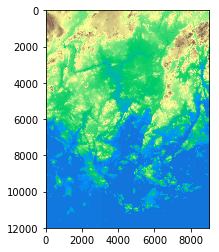

In [4]:
# Plot the mosaic
show(mosaic, cmap='terrain')

In [5]:
# Create an updated metaData object
outMeta = fh.meta.copy()
outMeta.update({"driver": "GTiff",
                "height": mosaic.shape[1],
                "width": mosaic.shape[2],
                "transform": outTrans,
                "crs": "+proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs "})

In [6]:
# Write data to a new file
outFile = "Data/Helsinki_DEM_2x2m_Mosaic.tif"
with rasterio.open(outFile, "w", **outMeta) as dest:
    dest.write(mosaic)